# **Boston Housing Price Prediction**


## **1. nhập thêm các thư viện cần thiết**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- `pandas`: Để thao tác và phân tích dữ liệu.
- `numpy`: Đối với các phép toán số.
- `matplotlib`: Để trực quan hóa dữ liệu.
- `scikit-learn`:
    - `train_test_split`: Để chia dữ liệu thành các tập huấn luyện và kiểm tra.
    - `StandardScaler`: Để chuẩn hóa các tính năng.
    - `Regression models`: (Tuyến tính, Cây quyết định và Rừng ngẫu nhiên) và các chỉ số hiệu suất.
- `tensorflow`: Để tạo và huấn luyện mô hình Perceptron đa lớp (MLP).


## **2. Tải cơ sở dữ liệu nhà ở Bostont**


In [2]:

data = pd.read_csv("BostonHousing.csv")

#chia dữ liệu thành các tính năng và mục tiêu
X = data.drop(columns=["medv"])
y = data["medv"]
print("dataset chạy thành công")

print(data)

dataset chạy thành công
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

- tập dữ liệu được tải xuống từ tệp file  .CSV,chia dữ liệu thành các tính năng (`X`) và biến mục tiêu (`y`).

- note: `BostonHousing.csv` lưu ý nhớ coi file path trước khi chạy


- `X`: Independent variables (features).
- `y`: Dependent variable (target house price).

## **3. Chia dữ liệu thành các tập huấn luyện và kiểm tra**

- Chúng tôi chia tập dữ liệu thành tập con huấn luyện (80%) và tập con kiểm tra (20%).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape,y_train.shape

((404, 13), (404,))

In [5]:
X_test.shape,y_test.shape

((102, 13), (102,))

## **4. Chia tỷ lệ các tính năng**


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- `StandardScaler`: các tính năng của thang đo có giá trị trung bình là 0 và độ lệch chuẩn là 1, cải thiện hiệu suất của mô hình.

## **5. Xây dựng và huấn luyện mô hình Perceptron đa lớp (MLP)**


In [7]:
mlp_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])


c:\Users\nguye\OneDrive\Desktop\Practice-exercise-4-Multilayer-Perceptron-Regression-Exercise-Predicting-House-Prices\myvenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **Lớp đầu vào**: Khớp với số lượng đối tượng trong tập dữ liệu.
- **Lớp ẩn**:

      - Lớp 1: 32 nơ-ron, kích hoạt ReLU.

      - Lớp 2: 16 nơ-ron, kích hoạt ReLU.
      
- **Lớp đầu ra**: 1 nơ-ron, kích hoạt tuyến tính (đối với các tác vụ hồi quy).

In [8]:
mlp_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

- **Optimizer**: Adam (adaptive learning rate optimization).
- **Loss Function**: Mean Squared Error (MSE) for regression.
- **Metric**: Mean Absolute Error (MAE) to monitor performance during training.

In [9]:
history = mlp_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 585.9449 - mae: 22.2335 - val_loss: 518.4450 - val_mae: 20.9624
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 593.4918 - mae: 22.2545 - val_loss: 491.1931 - val_mae: 20.3320
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 521.2109 - mae: 20.8216 - val_loss: 465.1599 - val_mae: 19.7090
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 500.5254 - mae: 20.1813 - val_loss: 438.2195 - val_mae: 19.0434
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 503.9911 - mae: 20.1870 - val_loss: 408.6501 - val_mae: 18.3185
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 468.7238 - mae: 19.5097 - val_loss: 375.3842 - val_mae: 17.4796
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 412.7311 - mae: 18.3374 - val_loss: 338.4968 - val_mae: 16.5224
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 378.7475 - mae: 17.1069 - val_loss: 297.4553 - val_mae: 15.3875
Epoch 9/

- **Epochs**: Số lần đi qua dữ liệu huấn luyện.
- **Batch Size**: Số lượng mẫu được xử lý trước khi cập nhật mô hình.
- **Validation Data**: Theo dõi hiệu suất trên tập kiểm tra trong quá trình đào tạo.

## **6. Đánh giá mô hình MLP**
- Chúng tôi đánh giá MLP đã được đào tạo trên tập kiểm tra và trực quan hóa các dự đoán.

In [10]:
test_loss, test_mae = mlp_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.0418 - mae: 2.2134
Test Loss (MSE): 11.94750690460205
Test Mean Absolute Error (MAE): 2.333913564682007


- Đánh giá mô hình MLP bằng MSE và MAE trên dữ liệu thử nghiệm

In [11]:
y_pred_mlp = mlp_model.predict(X_test_scaled) #prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


- **in kết quả**

- In ra MSE và 𝑅2 thể hiện mức độ tốt của mô hình MLP

In [12]:
y_pred_mlp = y_pred_mlp.flatten()#mảng 1D

#tính toán các chỉ số
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

#in ra kết quả
print("MLP Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_mlp:.2f}")
print(f"R² Score: {r2_mlp:.2f}")


MLP Model Evaluation:
Mean Squared Error (MSE): 11.95
R² Score: 0.84


- `y_pred_mlp`: Dự đoán của mô hình MLP

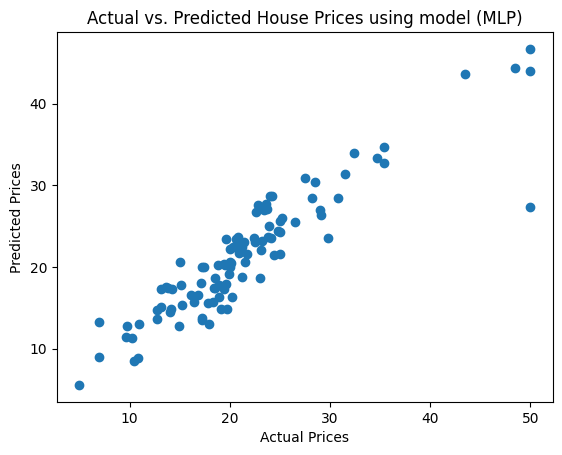

In [13]:
plt.scatter(y_test, y_pred_mlp)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices using model (MLP)')
plt.show()


- Vẽ biểu đồ phân tán để so sánh giá nhà thực tế `(Actual Prices)` và dự đoán `(Predicted Prices)`.

## **7. So sánh với các mô hình hồi quy khác**

- Chúng tôi so sánh mô hình MLP với hồi quy tuyến tính(`Linear Regression`), hồi quy cây quyết định(`Decision Tree`) và hồi quy rừng ngẫu nhiên(`Random Forest`).

**7.1 Linear Regression**

In [14]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("predicted value:")
print(y_pred_lr)

predicted value:
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.830769

**7.2 Decision Tree**

In [15]:
#Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("predicted value:")
print(y_pred_dt)

predicted value:
[28.1 33.1 17.3 22.  23.2 18.5 16.6 16.6 22.7 22.  20.5 27.1  8.4 21.4
 18.5 23.9 18.8 10.5 46.  13.  23.1 24.4 13.6 22.  14.5 11.7 21.  13.5
 19.4 20.7 18.8 23.1 10.4 16.2 13.3 13.1 33.4 18.5 20.4 24.8 19.8 28.4
 46.  19.3 22.  13.  14.9 24.1 17.7 32.  21.7 36.1 16.7 28.4 43.1 18.5
 15.2 22.8 22.  22.5 24.5 33.  29.4 19.3 26.6 14.4 13.  22.9 22.8 14.1
 21.8 28.7  8.3 18.6 21.5 10.5 19.8 50.  13.3  8.1 21.2 16.3 19.4 10.5
 14.5 29.9 14.8 23.1 22.9 18.  23.3  8.8 19.2 17.6 16.2 19.3 50.  16.3
 11.7 16.3 19.  26.4]


**7.3 Random Forest Regression**

In [16]:
#Random Forest Regression
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("predicted value:")
print(y_pred_rf)

predicted value:
[22.839 30.689 16.317 23.51  16.819 21.425 19.358 15.62  21.091 21.073
 20.028 19.298  8.611 21.456 19.378 25.453 19.187  8.538 46.132 14.536
 24.728 23.996 14.509 23.847 14.363 14.796 21.121 13.663 19.535 21.29
 19.45  23.392 29.3   20.338 14.596 15.594 33.835 19.129 20.915 24.376
 19.286 29.61  46.108 19.428 22.653 13.676 15.037 24.321 18.689 28.821
 21.107 33.823 16.502 25.763 44.922 21.994 15.416 32.032 22.596 20.296
 25.597 33.928 28.134 18.551 26.745 17.568 13.992 23.195 29.022 15.663
 21.064 27.426 10.06  21.569 21.956  7.084 19.905 46.154 11.274 12.981
 21.288 12.501 19.579  9.392 20.76  27.283 15.383 23.398 23.628 17.617
 21.681  8.019 19.616 18.714 22.592 19.786 41.733 12.726 12.632 13.066
 20.603 23.902]


- `Mean Squared Error`(MSE): Đo chênh lệch bình phương trung bình giữa giá trị thực tế và giá trị dự đoán.
- `R-squared`: Cho biết mô hình giải thích phương sai của biến mục tiêu tốt như thế nào.
- So sánh MLP với các mô hình truyền thống (Hồi quy tuyến tính`(Linear Regression)`, Cây quyết định`(Decision Tree)`, Rừng ngẫu nhiên`(Random Forest)`)

In [17]:
models = {
    "MLP": y_pred_mlp.flatten(),
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} -> MSE: {mse:.2f}, r2-squared: {r2:.2f}")

MLP -> MSE: 11.95, r2-squared: 0.84
Linear Regression -> MSE: 24.29, r2-squared: 0.67
Decision Tree -> MSE: 10.42, r2-squared: 0.86
Random Forest -> MSE: 7.91, r2-squared: 0.89


source code github: https://github.com/HUyEsona/Practice-exercise-4-Multilayer-Perceptron-Regression-Exercise-Predicting-House-Prices.git